PyTorch version: 2.7.1+cu126
torchvision version: 0.22.1+cu126
Image shape: torch.Size([1, 28, 28])


c:\Users\hyun\.conda\envs\torch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001F69BCCB880>, <torch.utils.data.dataloader.DataLoader object at 0x000001F69C03EAA0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32
Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])
Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]
helper_functions.py already exists, skipping download


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:10<00:21, 10.81s/it]


Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:21<00:10, 10.78s/it]


Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:32<00:00, 10.83s/it]


Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 32.499 seconds



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%


 33%|███▎      | 1/3 [00:11<00:22, 11.12s/it]

Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%


 67%|██████▋   | 2/3 [00:23<00:11, 11.83s/it]

Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%


100%|██████████| 3/3 [00:35<00:00, 11.97s/it]

Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 35.905 seconds


Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

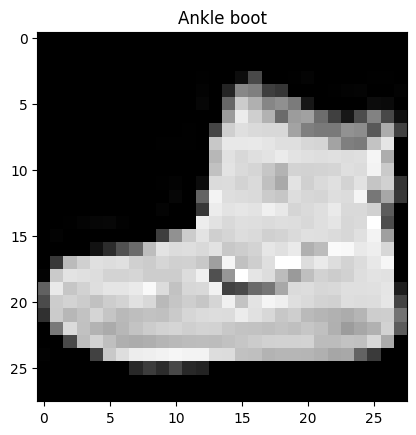

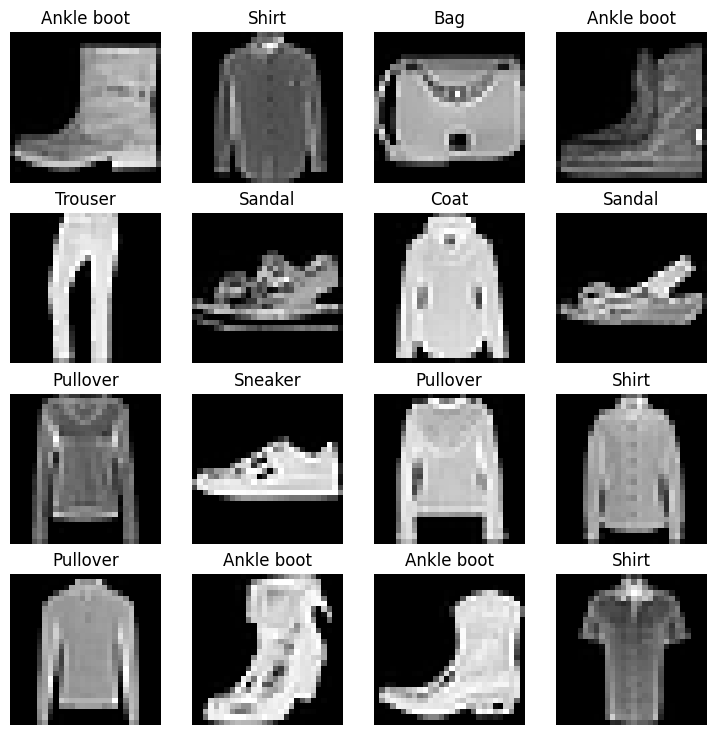

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)
# See first training sample
image, label = train_data[0]
image, label
# See classes
class_names = train_data.classes
class_names
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
#print(x)
#print(output)
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
)
model_0.to("cpu") # keep model on CPU to begin with 
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() 
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)
           
            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results
# Check baseline results
model_0_results
# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input) 
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

In [2]:
torch.manual_seed(42)

random_tensor = torch.randn(size=(1,1,2,2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


# max_pool_layer 
Essentially, every layer in a neural network is trying to compress data from higher dimensional space to lower dimensional space
즉, 수많은 숫자(raw data)를 받아들이고, 그 숫자들 안에서 예측에 유용한 패턴을 학습하며, 동시에 그 패턴은 원래 데이터보다 더 작은 크기를 가짐
From an artificial intelligence perspective, you could conisder the whole goal of a neural network to compress information

From the point of view of a neural network, intelligence is compression.
In essence lowering the dimensionality of a tensor whilst still retaining a (가능하다면) significant portion of the information
(즉, 중요한 정보를 유지하면서도 텐서의 차원을 줄이는 것)
Except instead of just taking the maximum, the nn.Conv2d() performs a convolutional operation on the data (nn.Conv2d()는 단순히 최대값을 취하는 대신, 데이터에 대해 합성곱 연산을 수행함)

In [3]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params =model_2.parameters(), lr=0.1)

In [4]:
# Training and testing model_2 using our training and test functions
from tqdm.auto import tqdm
from helper_functions import accuracy_fn

torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------------------")
    train_step(data_loader=train_dataloader,
               model=model_2,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device = device)
    
    test_step(data_loader=test_dataloader,
              model=model_2,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------------
Train loss: 0.59093 | Train accuracy: 78.56%


 33%|███▎      | 1/3 [00:14<00:28, 14.17s/it]

Test loss: 0.40671 | Test accuracy: 85.61%

Epoch: 1
-------------------
Train loss: 0.35887 | Train accuracy: 86.96%


 67%|██████▋   | 2/3 [00:27<00:13, 13.79s/it]

Test loss: 0.35326 | Test accuracy: 87.29%

Epoch: 2
-------------------
Train loss: 0.32281 | Train accuracy: 88.22%


100%|██████████| 3/3 [00:41<00:00, 13.87s/it]

Test loss: 0.32085 | Test accuracy: 88.61%

Train time on cuda: 41.606 seconds


In [5]:
model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn = accuracy_fn
)
print(model_2_results)

{'model_name': 'FashionMNISTModelV2', 'model_loss': 0.32084593176841736, 'model_acc': 88.6082268370607}


In [ ]:
# Compare model results and training time
import pandas as pd

compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results]) # eval_model에서의 return값을 바탕으로 DataFrame이 생성됨
print(compare_results)

# model_0 – 두 개의 nn.Linear() 층으로 구성된 기본 모델
# model_1 – 기본 모델과 동일하지만 nn.Linear() 층 사이에 nn.ReLU() 층이 추가된 모델
# model_2 – CNN Explainer 웹사이트의 TinyVGG 아키텍처를 모방한 첫 번째 CNN 모델

            model_name  model_loss  model_acc
0  FashionMNISTModelV0    0.476639  83.426518
1  FashionMNISTModelV1    0.685001  75.019968
2  FashionMNISTModelV2    0.320846  88.608227


In [ ]:
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
print(compare_results)

# Something to be aware of in machine learning is the performance-speed tradeoff(균형)
# Generally, you get better performance out of a larger, more complex model (일반적으로 더 크고 복잡한 모델일수록 더 좋은 성능을 낼 수 있음)
# However, this performance increase often comes at a sacrifice of training speed and inference speed

# The Training times you get will be very dependent on the hardware you use

            model_name  model_loss  model_acc  training_time
0  FashionMNISTModelV0    0.476639  83.426518      32.499106
1  FashionMNISTModelV1    0.685001  75.019968      35.904783
2  FashionMNISTModelV2    0.320846  88.608227      41.606288


Text(0, 0.5, 'model')

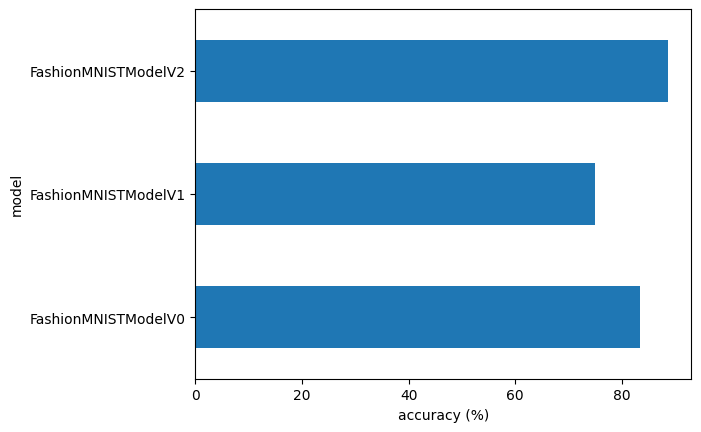

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh") 
# .set_index() 메서드 : DataFrame에서 특정 열을 인덱스로 설정할 수 있게 해주는 메서드
# .plot(kind="barh") : barh는 bar + horizontal, 수평 막대그래프를 의미함

plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [17]:
print(compare_results.set_index("model_name"))
print("--------------------------------------------------------------")
print(compare_results.set_index("model_name")["model_acc"])

                     model_loss  model_acc  training_time
model_name                                               
FashionMNISTModelV0    0.476639  83.426518      32.499106
FashionMNISTModelV1    0.685001  75.019968      35.904783
FashionMNISTModelV2    0.320846  88.608227      41.606288
--------------------------------------------------------------
model_name
FashionMNISTModelV0    83.426518
FashionMNISTModelV1    75.019968
FashionMNISTModelV2    88.608227
Name: model_acc, dtype: float64


In [ ]:
# Make and evaluate random predictions with best model

def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs =[]
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)

            pred_logit = model(sample) # Forward pass (model outputs raw logit)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # Get prediction probability (logit -> prediction probability)
            # perform softmax on the logits dimension, not batch dimension (in this case we have a batch size of 1, so can perform on dim=0)

            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs) # Stack the pred_probs to turn list into a tensor (torch.stack() : 리스트에 있는 여러 개의 텐서를 하나의 텐서로 쌓아서 합치는 함수)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels =[]
for sample, label in random.sample(list(test_data), k=9):  # test_data는 FashionMNIST 데이터셋  # k=9는 뽑아올 샘플의 개수
    test_samples.append(sample)
    test_labels.append(label)

print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [ ]:
pred_probs = make_predictions(model = model_2,
                              data = test_samples)

# View firt two prediction probabilities
print(pred_probs[:2])

tensor([[5.5739e-08, 1.2604e-07, 4.3558e-08, 7.0864e-08, 1.5559e-08, 9.9985e-01,
         1.2333e-07, 4.0882e-06, 9.2753e-06, 1.3991e-04],
        [5.7456e-02, 5.8845e-01, 1.9644e-03, 2.0134e-01, 8.6747e-02, 1.2136e-04,
         6.3025e-02, 3.7224e-04, 4.3099e-04, 9.2323e-05]])


In [30]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
print(pred_classes)

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])


In [31]:
print(test_labels, pred_classes)

[5, 1, 7, 4, 3, 0, 4, 7, 1] tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])


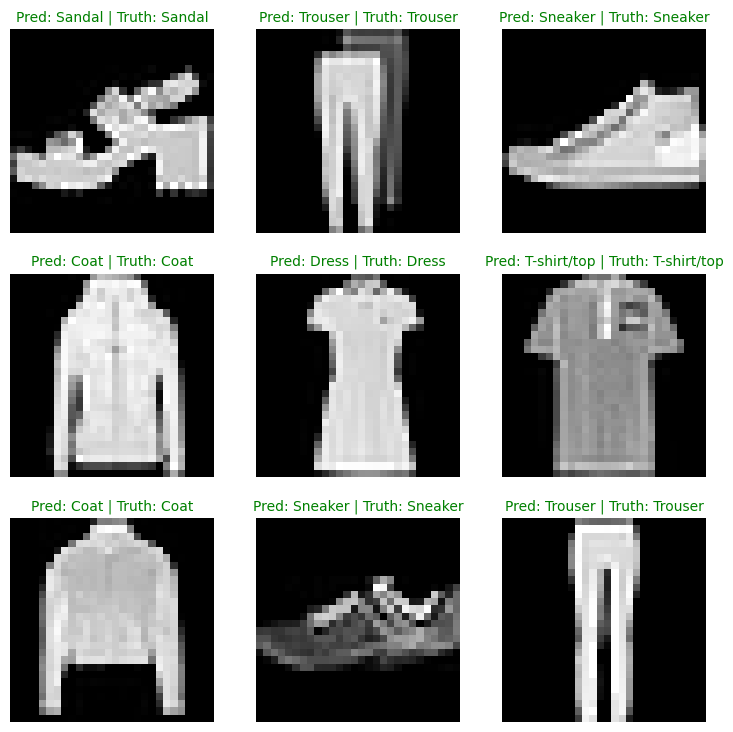

In [34]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)

    plt.imshow(sample.squeeze(), cmap="gray")

    pred_label = class_names[pred_classes[i]]

    truth_label = class_names[test_labels[i]]

    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False)

In [ ]:
# Making a confusion matrix for further prediction evaluation

# A confusion matrix shows you where your classification model got confused between predictions and true labels
# 1. Make predictions with trained model, model_2 (a confusion matrix compares predictions to true labels)
# 2. Make a confusion matrix using torchmetrics.ConfusionMatrix
# 3. Plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix()

from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader, desc= "Making predictions"): # test_dataloader로부터 배치 단위로 데이터를 가져오면서, tqdm으로 진행 상황을 "Making predictions"라는 텍스트와 함께 표시 (desc 매개변수는 progress bar앞에 표시되는 설명 텍스트를 지정할 때 사용)
        X,y = X.to(device), y.to(device)
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        y_preds.append(y_pred.cpu()) # Put predictions on CPU for evaluation
y_pred_tensor = torch.cat(y_preds)  # Concatenate list of predictions into a tensor (리스트 형태로 저장된 예측값들을 하나의 텐서로 이어 붙임)  
# .cat : concatenate의 줄임말, 여러 텐서를 하나로 연결 (리스트나 튜플, 텐서 등을 입력으로 받음 / 연결하려는 것들은 모두 동일한 shape을 가져야함)

Making predictions: 100%|██████████| 313/313 [00:01<00:00, 179.93it/s]


In [37]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


In [ ]:
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19  # assert문은 조건이 False일 경우 에러를 발생시켜 실행을 멈춤

0.23.4


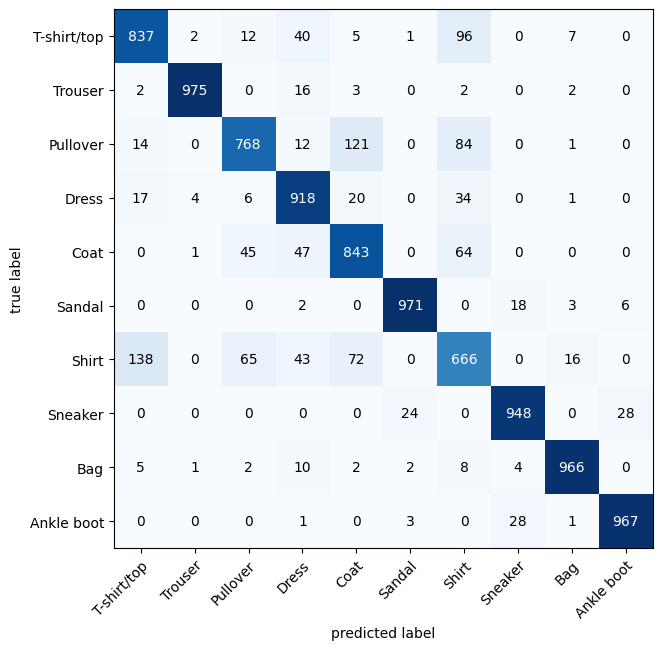

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task = 'multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(     # plot_confusion_matrix의 반환값은 fig : 전체 그림(도화지, 그래프 전체 레이아웃), ax : 실제 혼동 행렬이 그려지는 축(그래프 한칸)
    conf_mat=confmat_tensor.numpy(),  # conf_mat매개변수 : 실제로 시각화할 혼동 행렬 데이터를 넘겨주는 인자
    class_names = class_names,  # turn the row and column labels into class names
    figsize = (10,7)
)

In [45]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models\03_pytorch_computer_vision_model_2.pth


In [46]:
# Since we're using load_state_dict(), we'll need to create a new instance of FashionMNISTV2() with the same input parameters as our saved model state_dict()

# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Loading model will error if the shapes here aren't the same as the saved version  (여기서 지정한 모델 shape이 저장된 모델과 다르면 로딩할 때 오류가 발생)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=10)

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2 = loaded_model_2.to(device)

In [49]:
# evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
print(loaded_model_2_results)
print(model_2_results)

{'model_name': 'FashionMNISTModelV2', 'model_loss': 0.32084593176841736, 'model_acc': 88.6082268370607}
{'model_name': 'FashionMNISTModelV2', 'model_loss': 0.32084593176841736, 'model_acc': 88.6082268370607}


In [51]:
# We can find out if two tensors are close to each other using torch.isclose() and passing in a tolerance level of closeness via the parameters atol(absolute tolerance) and rtol(relative tolerance).
# If our model's results are close, the output of torch.isclose() should be true
# atol과 rtol 매개변수를 통해서 허용 오차 범위를 지정 가능

torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol= 1e-08, # absolute tolerance
              rtol=0.001) # relative tolerance

tensor(True)

# PyTorch Custom Datasets

PyTorch has many built-in datasets used for a wide number of machine learning benchmarks, however, you'll often want to use your own custom dataset.

A custom dataset is a collection of data relating to a specific problem you're working on.
In essence, a custom dataset can be comprised of almost anything (맞춤형 데이터셋은 거의 어떤 형태로든 구성 가능함)

PyTorch includes many existing functions to load in various custom datasets in the TorchVision, TorchText, TorchAudio and TorchRec domain libraries
But sometimes these existing functions may not be enough
In that case, we can always subclass torch.utils.data.Dataset and customize it to our liking (torch.utils.data.Dataset을 상속하여 원하는 방식으로 커스터마이징 가능)

0. Importing PyTorch and setting up device-agnostic code
1. Get data

2. Become one with the data (data preparation)
 - At the beginning of any new machine learning problem, it's paramount to understand the data you're working with. Here we'll take some steps to figure out what data we have

3. Transforming data 
 - Often, the data you get won't be 100% ready to use with a machine learning model, here we'll look at some steps we can take to transform our images so they're ready to be used with a model  
 (대부분의 경우, 데이터를 바로 모델에 사용할 수 없음, 여기서 이미지를 모델에 맞게 변환하는 방법을 배움)

4. Loading data with ImageFolder(option 1)
 - PyTorch has many in-built data loading functions for common types of data. ImageFolder is helpful if our images are in standard image classification format
 (PyTorch에는 일반적인 데이터 형식에 맞는 데이터 로딩 함수들이 내장되어 있음, 이미지가 일반적인 분류 구조라면 ImageFolder를 사용하는 것이 유용함)

5. Loading image data with a custom Dataset
 - What if PyTorch didn't have an in-built function to load data with? This is where we can build our own custom subclass of torch.utils.data.Dataset
 (PyTorch에 해당 데이터를 불러올 수 있는 내장 함수가 없을 때는 torch.utils.data.Dataset을 상속받아 직접 사용자 정의 데이터셋 클래스를 만들 수 있음)

6. Other forms of transforms (data augmentation(증강))
 - Data augmentation is a common technique for expanding the diversity of your training data. Here we'll explore some of torchvision's in-built data augmentation functions.
 (데이터 증강은 훈련 데이터의 다양성을 높이기 위한 일반적인 기법임)

7. Model 0: TinyVGG without data augmentation 
 - By this stage, we'll have our data ready, let's build a model capable of fitting it. We'll also create some training and testing